In [50]:
'''
Importing libraries
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [51]:
# Load the data and look at our data
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


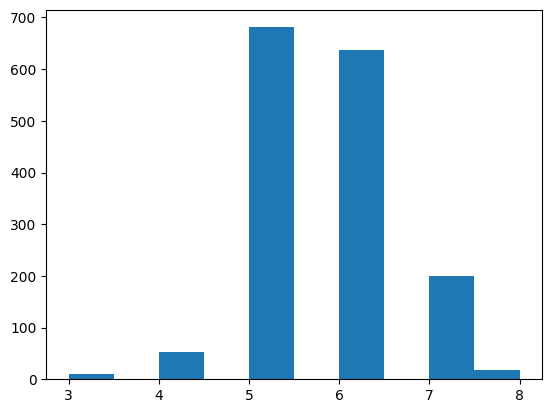

In [52]:
# explore the quality of the wine column
plt.hist(df.quality)
plt.show()

In [53]:
# For simplicity, let's create a dictionary that maps the quality values from 3 to 8 to a quality scale from 0 to 5
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}
df.loc[:,"quality"] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [54]:
'''Before we split the data into training and testing datasets, let's shuffle the data to ensure that the data is not ordered in any way.
This is to ensure that the training/test split is random and representative of the data.
We can do this by using the sample method in pandas which returns a random sample of items.
We can use the frac parameter to specify the fraction of rows we want to return in the random sample.
Here, we are using frac=1 to return all rows in the dataframe.
The reset_index method resets the index of the dataframe after shuffling since they change after shuffling.
'''
df = df.sample(frac=1).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,5
1,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.30,3
2,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.20,2
3,8.3,0.49,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.50,3
4,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.50,3
1595,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.50,3
1596,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.50,2
1597,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.40,3


In [55]:
# This dataset has 1599 samples. Let's split the data into a training and testing dataset.
# We will use top 1000 samples for training and tail 599 samples for testing.
df_train = df.head(1000)
df_test = df.tail(599)

In [56]:
# Let's train a decision tree classifier on this data
# We will use the DecisionTreeClassifier class from the sklearn.tree module
# We will use the max_depth parameter to limit the depth of the tree
# This is to prevent the tree from overfitting the data
# We will set the max_depth to 7 to start with
clf = tree.DecisionTreeClassifier(max_depth=7)

In [57]:
# Choose the columns (features) we want to train on.
# We will use all columns except the quality column which is our target
cols = df.columns.values[1:11]

In [58]:
print (cols)

['volatile acidity' 'citric acid' 'residual sugar' 'chlorides'
 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH' 'sulphates'
 'alcohol']


In [59]:
# Train the model on the chosen columns and the quality column
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [60]:
# Now that we have trained the model, let's make predictions on the training data
train_predictions = clf.predict(df_train[cols])

In [61]:
# Let's evaluate the model's performance on the test data
test_predictions = clf.predict(df_test[cols])

In [62]:
# We will use the accuracy_score function from the sklearn.metrics module to calculate the accuracy of the model on the training and test data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [63]:
# check the training and test accuracy of the model
print("Training accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.793
Test accuracy:  0.5909849749582637


In [64]:
# We used the max_depth=7 above to limit the depth of the tree to prevent overfitting.
#But what is the best value for max_depth?
#We can use a for loop to iterate over a range of values for max_depth and train a model for each value.
#We can then evaluate the model on the training and test data to find the best value for max_depth.
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

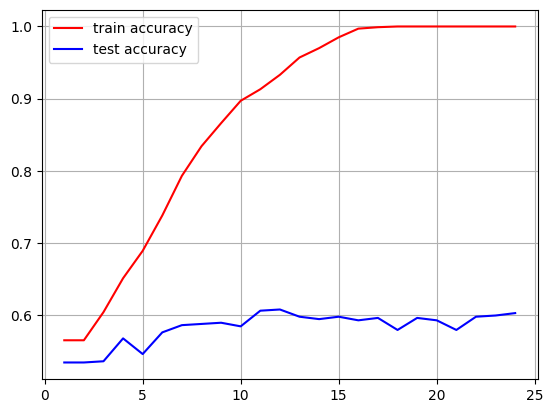

In [65]:
# Let's plot the training and test accuracies for different values of max_depth
# This plot should give us an idea of the best value for max_depth and check for overfitting
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="test accuracy")
plt.grid()
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

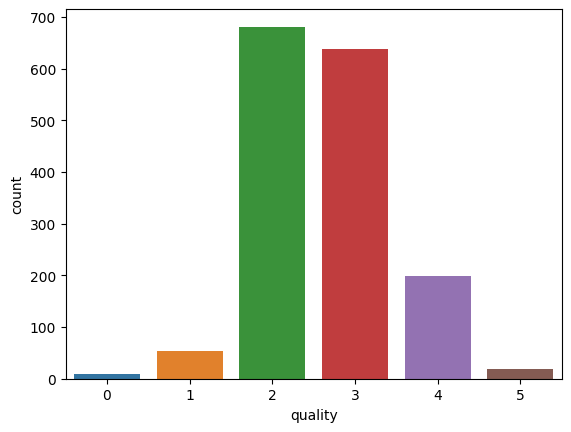

In [66]:
# Okay, at the top we used the most simple way to split the data into training and testing datasets.
# This kind of split is called a holdout validation.
# There are other ways to split the data into training and testing datasets.
# But let's first visualize the quality column to see how the data is distributed.
sns.countplot(x='quality', data = df)

In [67]:
# The quality column is not evenly distributed.
# So, we can use stratified sampling to split the data into training and testing datasets.
# Stratified sampling ensures that the distribution of the target variable is the same in both the training and testing datasets.
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df[cols].values
y = df['quality'].values

skf = StratifiedKFold(n_splits=5)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = clf
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

Mean Accuracy: 0.6266594827586207


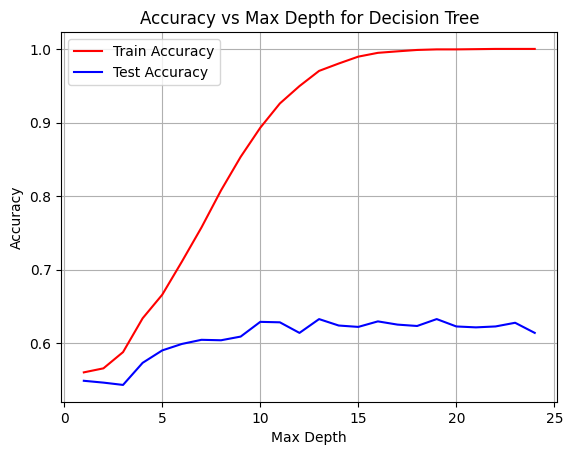

In [68]:
# The StratifiedKFold validation gives a better performance estimate than the holdout validation.
# Now let's again find the best value for max_depth.
# Lists to store the results
train_accuracies = []
test_accuracies = []
depths = list(range(1, 25))

for max_depth in depths:
    fold_train_accuracies = []
    fold_test_accuracies = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        
        clf.fit(X_train, y_train)
        
        train_predictions = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_predictions)
        fold_train_accuracies.append(train_accuracy)
        
        test_predictions = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        fold_test_accuracies.append(test_accuracy)
    
    train_accuracies.append(np.mean(fold_train_accuracies))
    test_accuracies.append(np.mean(fold_test_accuracies))

plt.plot(depths, train_accuracies, color="red", label="Train Accuracy")
plt.plot(depths, test_accuracies, color="blue", label="Test Accuracy")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.grid()
plt.legend()
plt.show()